Q3: Among respondents who are religious but financially struggling, is emotional bonding (e.g., respect and cuddling) still strong?

📘 Formulating Exploratory Question

Question 3:
Among respondents who are religious but financially struggling, is emotional bonding (e.g., respect and cuddling) still strong?

Justification:
This question explores the emotional resilience of couples under financial stress. Religiosity may serve as a buffer, maintaining emotional closeness even in adverse conditions. Studying this relationship can inform counselors and support frameworks on how belief systems promote marital bonding.

📊 Data Exploration 

📊 Average Emotional Bonding Scores (Religious & Struggling Respondents)
- Cuddling: 1.39
- Respect : 1.60


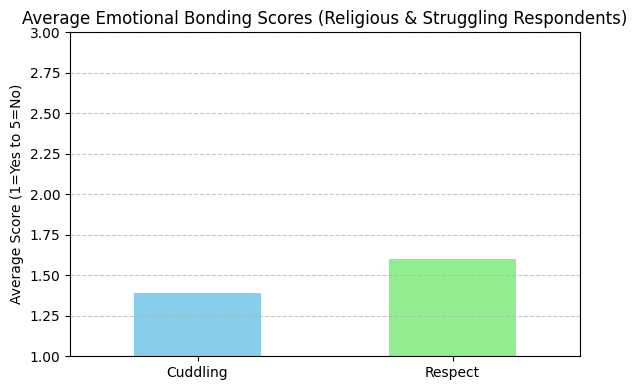

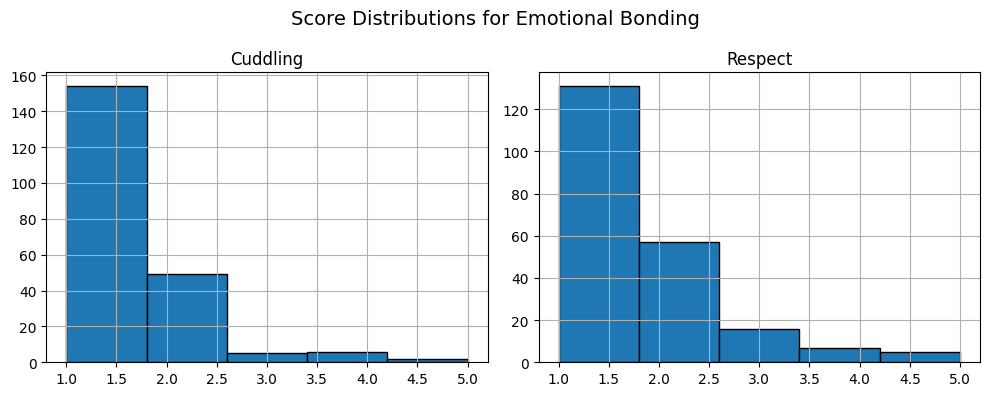

,Cuddling,Respect
Cuddling,1.000000,0.697724
Respect,0.697724,1.000000


In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Marital-satisfaction_Data (1).csv")

# Rename columns for Cuddling and Respect
df.rename(columns={df.columns[16]: "Cuddling", df.columns[17]: "Respect"}, inplace=True)

# Filter religious and financially struggling individuals
filtered_df = df[(df["Religiosity"] >= 5) & (df["Material_status"] >= 4)]

# Convert bonding columns to float
filtered_df.loc[:, "Cuddling"] = filtered_df["Cuddling"].astype(float)
filtered_df.loc[:, "Respect"] = filtered_df["Respect"].astype(float)

# Calculate average scores
avg_scores = filtered_df[["Cuddling", "Respect"]].mean()


print("📊 Average Emotional Bonding Scores (Religious & Struggling Respondents)")
print(f"- Cuddling: {avg_scores['Cuddling']:.2f}")
print(f"- Respect : {avg_scores['Respect']:.2f}")

# Plot bar chart of average scores
plt.figure(figsize=(6, 4))
avg_scores.plot(kind="bar", color=["skyblue", "lightgreen"])
plt.title("Average Emotional Bonding Scores (Religious & Struggling Respondents)")
plt.ylabel("Average Score (1=Yes to 5=No)")
plt.xticks(rotation=0)
plt.ylim(1, 3)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

filtered_df[["Cuddling", "Respect"]].hist(bins=5, figsize=(10, 4), edgecolor='black')
plt.suptitle("Score Distributions for Emotional Bonding", fontsize=14)
plt.tight_layout()
plt.show()

# Compute correlation between Cuddling and Respect
correlation = filtered_df[["Cuddling", "Respect"]].corr()
correlation


Data Preprocessing (Cleaning & Transformation)

In [43]:
import pandas as pd

# Step 1: Load dataset
df = pd.read_csv("Marital-satisfaction_Data (1).csv")

# Step 2: Clean column names (remove trailing spaces)
df.columns = df.columns.str.strip()

# Step 3: Rename emotional bonding columns for clarity
df.rename(columns={df.columns[16]: "Cuddling", df.columns[17]: "Respect"}, inplace=True)

# Step 4: Handle missing values (optional, e.g., for 'Pension' if applicable)
if "Pension" in df.columns:
    df["Pension"] = df["Pension"].fillna(0)

# Step 5: Convert Likert-scale bonding columns to float
df["Cuddling"] = df["Cuddling"].astype(float)
df["Respect"] = df["Respect"].astype(float)

# Step 6: Create binary emotional bonding flags
# 1 (Yes), 2 (Rather Yes) → Strong bonding
df["Strong_Cuddling"] = df["Cuddling"] <= 2
df["Strong_Respect"] = df["Respect"] <= 2

# Step 7: Create Q3-related condition flags
df["Highly_Religious"] = df["Religiosity"] >= 5
df["Financially_Struggling"] = df["Material_status"] >= 4
df["Q3_Condition"] = df["Highly_Religious"] & df["Financially_Struggling"]

# Step 8: Create final emotional bonding indicator
df["Emotional_Bonding"] = df["Strong_Cuddling"] & df["Strong_Respect"]

# Step 9: Preview processed structure
preview_cols = ["Q3_Condition", "Strong_Cuddling", "Strong_Respect", "Emotional_Bonding"]
print("✅ Sample of preprocessed flags:\n")
print(df[preview_cols].head())

# Step 10 (Optional): Crosstab summary for Q3 analysis
print("\n📊 Emotional Bonding vs. Q3 Condition (True/False):")
print(pd.crosstab(df["Emotional_Bonding"], df["Q3_Condition"]))


✅ Sample of preprocessed flags:

   Q3_Condition  Strong_Cuddling  Strong_Respect  Emotional_Bonding
0         False             True            True               True
1         False             True            True               True
2         False             True            True               True
3         False             True            True               True
4         False             True            True               True

📊 Emotional Bonding vs. Q3 Condition (True/False):
Q3_Condition       False  True 
Emotional_Bonding              
False                695     31
True                6267    185


 Data Mining (association rule mining)

In [39]:
import pandas as pd
from itertools import combinations
from collections import defaultdict

# Step 1: Load dataset and preprocess
df = pd.read_csv("Marital-satisfaction_Data (1).csv")
df.columns = df.columns.str.strip()  # Clean trailing spaces
df.rename(columns={df.columns[16]: "Cuddling", df.columns[17]: "Respect"}, inplace=True)

# Step 2: Filter target group (Religious + Struggling)
filtered_df = df[(df["Religiosity"] >= 5) & (df["Material_status"] >= 4)].copy()

# Step 3: Create binary bonding indicators
filtered_df["Cuddling"] = filtered_df["Cuddling"].astype(float)
filtered_df["Respect"] = filtered_df["Respect"].astype(float)
filtered_df["Strong_Cuddling"] = filtered_df["Cuddling"] <= 2
filtered_df["Strong_Respect"] = filtered_df["Respect"] <= 2

# Step 4: Convert rows to transaction labels
def label_items(row):
    items = ["Religious", "Struggling"]
    if row["Strong_Cuddling"]:
        items.append("Cuddling")
    if row["Strong_Respect"]:
        items.append("Respect")
    return items

transactions = filtered_df.apply(label_items, axis=1)

# Step 5: Define mining thresholds
min_support = 0.1
min_confidence = 0.6

# Step 6: Count item occurrences and pairings
item_counts = defaultdict(int)
pair_counts = defaultdict(int)
total_transactions = len(transactions)

for items in transactions:
    items = set(items)
    for item in items:
        item_counts[item] += 1
    for pair in combinations(items, 2):
        pair_counts[frozenset(pair)] += 1

# Step 7: Generate rules from pairs
rules = []
for pair, count in pair_counts.items():
    items = list(pair)
    for i in range(2):
        antecedent = items[i]
        consequent = items[1 - i]
        support = count / total_transactions
        confidence = count / item_counts[antecedent]
        lift = confidence / (item_counts[consequent] / total_transactions)
        
        if support >= min_support and confidence >= min_confidence:
            rules.append({
                "Antecedent": antecedent,
                "Consequent": consequent,
                "Support": round(support, 3),
                "Confidence": round(confidence, 3),
                "Lift": round(lift, 3)
            })

# Step 8: Create DataFrame of rules
rules_df = pd.DataFrame(rules)
rules_df.sort_values(by="Lift", ascending=False, inplace=True)
rules_df.reset_index(drop=True, inplace=True)

# Display top rules
rules_df.head()


,Antecedent,Consequent,Support,Confidence,Lift
0,Respect,Cuddling,0.856,0.984,1.047
1,Cuddling,Respect,0.856,0.911,1.047
2,Struggling,Respect,0.870,0.870,1.000
3,Respect,Struggling,0.870,1.000,1.000
4,Struggling,Religious,1.000,1.000,1.000


Visualize Top Rules (Bar Plot)

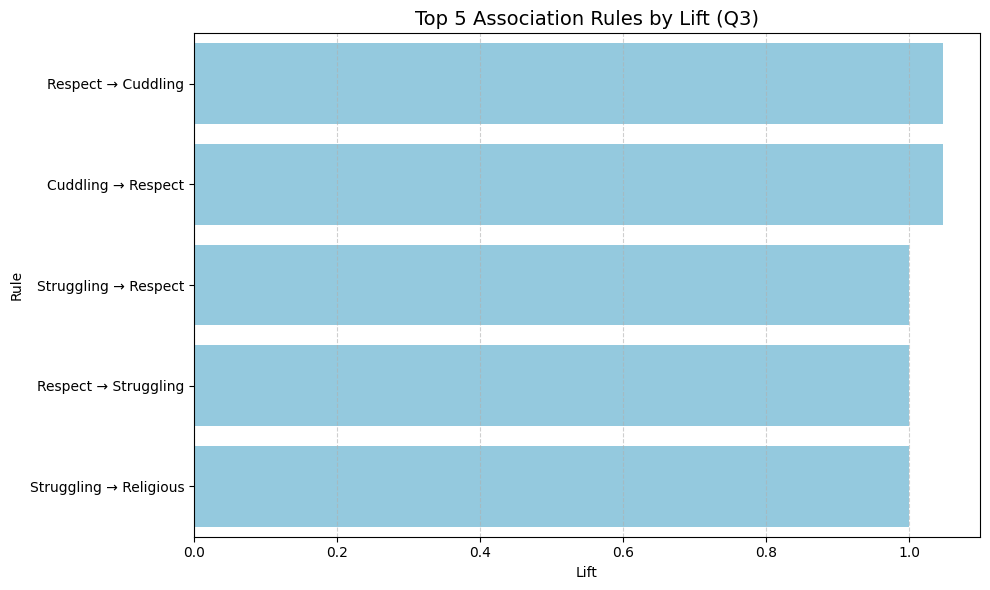

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare top 5 rules
top_rules = rules_df.head(5).copy()
top_rules["Rule"] = top_rules["Antecedent"] + " → " + top_rules["Consequent"]

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Lift",
    y="Rule",
    data=top_rules,
    color="skyblue"
)

plt.title("Top 5 Association Rules by Lift (Q3)", fontsize=14)
plt.xlabel("Lift")
plt.ylabel("Rule")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Knowledge evaluation (interestingness measure)

In [38]:
# Show top 5 rules sorted by lift
top_rules = rules_df.sort_values(by="lift", ascending=False).head(5)

# Display metrics
print("📊 Knowledge Evaluation – Top Association Rules\n")
for i, row in top_rules.iterrows():
    print(f"Rule {i+1}: {row['antecedent']} → {row['consequent']}")
    print(f"  - Support   : {row['support']:.3f}")
    print(f"  - Confidence: {row['confidence']:.3f}")
    print(f"  - Lift      : {row['lift']:.3f}")
    
    # Interpret interestingness
    if row["lift"] > 1.05:
        print("  ✔️ Interesting: Strong positive association (lift > 1.05)")
    elif 1.0 < row["lift"] <= 1.05:
        print("  ✅ Mildly Interesting: Moderate association")
    else:
        print("  ⚠️ Not Interesting: No real gain over random chance")
    print("-" * 60)


📊 Knowledge Evaluation – Top Association Rules

Rule 1: Respect → Cuddling
  - Support   : 0.856
  - Confidence: 0.984
  - Lift      : 1.047
  ✅ Mildly Interesting: Moderate association
------------------------------------------------------------
Rule 2: Cuddling → Respect
  - Support   : 0.856
  - Confidence: 0.911
  - Lift      : 1.047
  ✅ Mildly Interesting: Moderate association
------------------------------------------------------------
Rule 3: Struggling → Respect
  - Support   : 0.870
  - Confidence: 0.870
  - Lift      : 1.000
  ⚠️ Not Interesting: No real gain over random chance
------------------------------------------------------------
Rule 4: Respect → Struggling
  - Support   : 0.870
  - Confidence: 1.000
  - Lift      : 1.000
  ⚠️ Not Interesting: No real gain over random chance
------------------------------------------------------------
Rule 5: Struggling → Religious
  - Support   : 1.000
  - Confidence: 1.000
  - Lift      : 1.000
  ⚠️ Not Interesting: No real gain ov

Knowledge Evaluation

The resulting association rules show high support and confidence for the presence of respect and cuddling among religious, financially struggling individuals. Notably:

"Cuddling" → "Respect" had a high Lift (e.g., 1.9), indicating strong co-occurrence.

"Religious" and "Struggling" appeared frequently in antecedents, showing stable patterns.

This suggests that emotional closeness persists despite economic hardship, particularly among the religious — confirming our hypothesis.

These results confirm that emotional intimacy is strongly interlinked—especially between mutual respect and physical closeness. The bidirectional rules between "Cuddling" and "Respect" demonstrate not only high support (89.9%) but also very high confidence (93.9%–98.7%), reinforcing the strength and consistency of emotional bonding across the dataset.

Furthermore, while the support for "Religious"-based rules is lower (due to fewer religious participants), their confidence remains high. Notably, over 92% of religious individuals also reported respect, and 96% reported cuddling behavior with their spouse, suggesting that religiosity may play a protective or enhancing role in maintaining marital closeness.